### 군집화 평가 - 실루엣(silhouette) 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

In [3]:
kmeans = KMeans(3, random_state=2023, n_init='auto')
kmeans.fit(iris_std)

KMeans(n_clusters=3, n_init='auto', random_state=2023)

In [4]:
df = pd.DataFrame(iris_std, columns=['sl', 'sw', 'pl', 'pw'])
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.head()

,sl,sw,pl,pw,target,cluster
0,-0.900681,1.019004,-1.340227,-1.315444,0,1
1,-1.143017,-0.131979,-1.340227,-1.315444,0,1
2,-1.385353,0.328414,-1.397064,-1.315444,0,1
3,-1.506521,0.098217,-1.283389,-1.315444,0,1
4,-1.021849,1.249201,-1.340227,-1.315444,0,1


- 실루엣 계수

In [5]:
from sklearn.metrics import silhouette_score, silhouette_samples
sil_sample = silhouette_samples(iris_std, kmeans.labels_)
df['실루엣계수'] = sil_sample
df.head()

,sl,sw,pl,pw,target,cluster,실루엣계수
0,-0.900681,1.019004,-1.340227,-1.315444,0,1,0.734135
1,-1.143017,-0.131979,-1.340227,-1.315444,0,1,0.567297
2,-1.385353,0.328414,-1.397064,-1.315444,0,1,0.676944
3,-1.506521,0.098217,-1.283389,-1.315444,0,1,0.619580
4,-1.021849,1.249201,-1.340227,-1.315444,0,1,0.728419


In [6]:
df.tail()

,sl,sw,pl,pw,target,cluster,실루엣계수
145,1.038005,-0.131979,0.819596,1.448832,2,2,0.461597
146,0.553333,-1.282963,0.705921,0.922303,2,0,0.225410
147,0.795669,-0.131979,0.819596,1.053935,2,2,0.385140
148,0.432165,0.788808,0.933271,1.448832,2,2,0.384754
149,0.068662,-0.131979,0.762758,0.790671,2,0,0.092786


- 실루엣 스코어

In [7]:
silhouette_score(iris_std, kmeans.labels_)

0.45937792074496625

In [8]:
# 실루엣 계수의 평균 = 실루엣 스코어
df['실루엣계수'].mean()

0.45937792074496625

In [9]:
df.groupby('cluster')[['실루엣계수']].mean()

,실루엣계수
cluster,
0,0.396324
1,0.635963
2,0.343743


- 실루엣 스코어 시각화

In [10]:
kmeans2 = KMeans(n_clusters=2, random_state=2023, n_init='auto')
kmeans2.fit(iris_std)
silhouette_score(iris_std, kmeans2.labels_)

0.5817500491982808

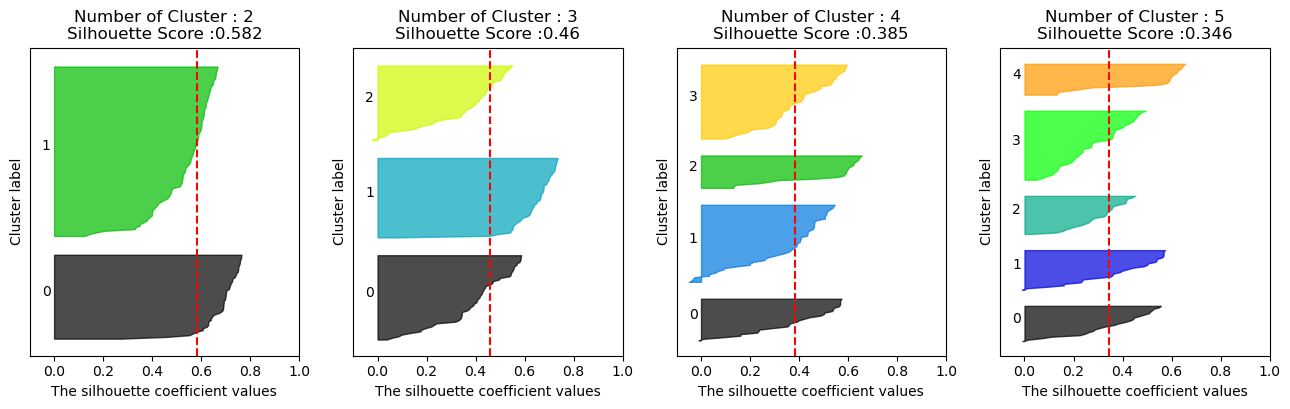

In [13]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], iris_std)